In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
pcla_all = pd.read_csv('PCLA_All_Emails.csv')

In [3]:
pcla_all.head()

,emailName,subjectLine,category,sentCount,scheduledDateTimestamp,delivered,deliveredPercent,bounced,bouncedPercent,opens,opensPercent,uniqueOpens,uniqueOpensPercent,clicks,clicksPercent,uniqueClicks,uniqueClicksPercent,initialClicks,initialClicksPercent,conversions,conversionsPercent,unsubscribes,unsubscribesPercent,spamReport,spamReportPercent,sentFromGid
0,Dedicated Email Blast Jessica and Kavitha - Mo...,“Loving Sports When They Don’t Love You Back” ...,General Information,1574,2021-05-20 09:52:28-10:00,1573,99.93647,1,0.06353,960,61.02988,567,36.04577,14,0.89002,12,2.11640,12,2.11640,8,0.50858,1,0.06357,0,0.0,9
1,May 2021 Newsletter,"Virtual Penn Alumni Weekend, Networking + Volu...",General Information,1577,2021-05-11 05:30:00-10:00,1577,100.00000,0,0.00000,1070,67.85035,584,37.03234,68,4.31199,62,10.61644,44,7.53425,2,0.12682,2,0.12682,0,0.0,9
2,Second Reminder Getty Museum,Today! Behind the Scenes at the Getty Museum!,General Information,19,2021-04-29 08:29:39-10:00,19,100.00000,0,0.00000,56,294.73685,16,84.21053,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.0,9
3,Reminder! Getty Museum,Reminder! Behind the Scenes at the Getty Museu...,General Information,19,2021-04-28 09:30:00-10:00,19,100.00000,0,0.00000,34,178.94737,11,57.89474,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.0,9
4,Third Dedicated Email Blast Getty Museum,This Thursday! Behind the Scenes at the Getty ...,General Information,1574,2021-04-27 09:00:00-10:00,1572,99.87293,2,0.12706,833,52.98982,512,32.56997,11,0.69975,8,1.56250,8,1.56250,1,0.06361,0,0.00000,0,0.0,9


In [4]:
df_all = pcla_all.drop(columns=['spamReport', 'category','spamReportPercent','sentFromGid', 'bounced', 'bouncedPercent', 'category', 'emailName','deliveredPercent', 'unsubscribesPercent','sentCount', 'initialClicks', 'initialClicksPercent', 'conversionsPercent', 'opensPercent','uniqueOpensPercent','clicksPercent','uniqueClicksPercent', 'unsubscribes'])
df_all.head()

,subjectLine,scheduledDateTimestamp,delivered,opens,uniqueOpens,clicks,uniqueClicks,conversions
0,“Loving Sports When They Don’t Love You Back” ...,2021-05-20 09:52:28-10:00,1573,960,567,14,12,8
1,"Virtual Penn Alumni Weekend, Networking + Volu...",2021-05-11 05:30:00-10:00,1577,1070,584,68,62,2
2,Today! Behind the Scenes at the Getty Museum!,2021-04-29 08:29:39-10:00,19,56,16,0,0,0
3,Reminder! Behind the Scenes at the Getty Museu...,2021-04-28 09:30:00-10:00,19,34,11,0,0,0
4,This Thursday! Behind the Scenes at the Getty ...,2021-04-27 09:00:00-10:00,1572,833,512,11,8,1


In [5]:
df_all = df_all.dropna()
#df_19.set_index('subjectLine', inplace = True)

In [6]:
timeStamp = df_all['scheduledDateTimestamp']
print(timeStamp)

0      2021-05-20 09:52:28-10:00
1      2021-05-11 05:30:00-10:00
2      2021-04-29 08:29:39-10:00
3      2021-04-28 09:30:00-10:00
4      2021-04-27 09:00:00-10:00
                 ...            
164    2018-01-15 08:00:00-10:00
165    2018-01-12 07:39:49-10:00
166    2018-01-11 05:00:00-10:00
167    2018-01-07 05:00:00-10:00
168    2018-01-02 07:00:00-10:00
Name: scheduledDateTimestamp, Length: 169, dtype: object


In [7]:
days = []
time = []
for index, value in timeStamp.items():
  #print(f"Index : {index}, Value : {value}")
  splitStamp = value.split(' ')
  #print(splitStamp)
  dayStamp = pd.to_datetime(splitStamp[0]).dayofweek
  days.append(dayStamp)
  time_stamp = int(splitStamp[1].split('-')[0].split(':')[0])
  time.append(time_stamp)

print(days)
print("=========")
print(time)

[3, 1, 3, 2, 1, 3, 1, 2, 0, 4, 3, 2, 0, 4, 2, 3, 1, 1, 1, 2, 1, 3, 6, 1, 6, 2, 2, 2, 3, 6, 3, 0, 6, 4, 1, 3, 1, 0, 3, 1, 1, 0, 6, 2, 4, 3, 1, 0, 2, 6, 2, 2, 6, 0, 1, 1, 1, 2, 3, 3, 3, 0, 1, 1, 4, 1, 2, 2, 2, 4, 1, 3, 2, 1, 1, 1, 2, 0, 1, 3, 1, 3, 1, 1, 4, 3, 3, 0, 4, 1, 0, 0, 3, 3, 0, 4, 0, 6, 2, 0, 1, 3, 1, 3, 3, 2, 0, 0, 2, 4, 1, 1, 3, 4, 2, 3, 2, 1, 6, 1, 1, 4, 2, 3, 1, 3, 1, 4, 2, 2, 1, 1, 2, 0, 0, 4, 3, 3, 2, 3, 0, 2, 0, 2, 2, 0, 2, 0, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 5, 3, 0, 0, 2, 0, 4, 3, 6, 1]
[9, 5, 8, 9, 9, 5, 9, 16, 9, 9, 11, 16, 8, 9, 8, 13, 13, 9, 8, 8, 11, 5, 13, 8, 10, 10, 8, 14, 10, 13, 6, 18, 16, 7, 13, 12, 5, 5, 5, 5, 10, 15, 14, 10, 5, 5, 13, 6, 11, 15, 6, 6, 6, 10, 11, 10, 6, 6, 22, 10, 10, 9, 10, 7, 22, 6, 7, 7, 7, 7, 11, 7, 6, 8, 6, 7, 6, 7, 8, 7, 5, 6, 5, 5, 17, 5, 8, 21, 6, 17, 7, 21, 5, 6, 21, 5, 9, 17, 21, 6, 7, 18, 8, 18, 11, 9, 18, 12, 7, 18, 6, 6, 6, 7, 17, 8, 8, 8, 17, 8, 4, 11, 6, 6, 5, 6, 7, 5, 10, 5, 5, 5, 5, 3, 8, 4, 18, 5, 5, 6, 5, 6, 5, 6, 5, 18, 6,

In [8]:
#Linear Model - DAY OF WEEK VS CONVERSIONS 
new_x_linear_days = days
new_y_linear_days = df_all['conversions']
new_x_linear_days = np.array(new_x_linear_days)
updated_x_linear_days = new_x_linear_days.reshape(-1,1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(updated_x_linear_days, new_y_linear_days, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.linear_model import LinearRegression
regressor_linear_days = LinearRegression()
regressor_linear_days.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#print(y_test)
y_pred = regressor_linear_days.predict(X_test)
#print(y_pred)

#Monday
print("Monday conversions expectation: ", regressor_linear_days.predict([[0]]))
#Tuesday
print("Tuesday conversions expectation: ",regressor_linear_days.predict([[1]]))
#Wednesday
print("Wednesday conversions expectation: ",regressor_linear_days.predict([[2]]))
#Thursday
print("Thursday conversions expectation: ",regressor_linear_days.predict([[3]]))
#Friday
print("Friday conversions expectation: ",regressor_linear_days.predict([[4]]))
#Saturday
print("Saturday conversions expectation: ",regressor_linear_days.predict([[5]]))
#Sunday
print("Sunday conversions expectation: ",regressor_linear_days.predict([[6]]))

Monday conversions expectation:  [7.34972035]
Tuesday conversions expectation:  [7.34543679]
Wednesday conversions expectation:  [7.34115323]
Thursday conversions expectation:  [7.33686967]
Friday conversions expectation:  [7.33258612]
Saturday conversions expectation:  [7.32830256]
Sunday conversions expectation:  [7.324019]


In [12]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

-1.160239798992119


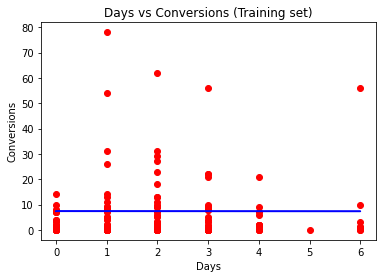

In [14]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor_linear_days.predict(X_train), color = 'blue')
plt.title('Days vs Conversions (Training set)')
plt.xlabel('Days')
plt.ylabel('Conversions')
plt.show()

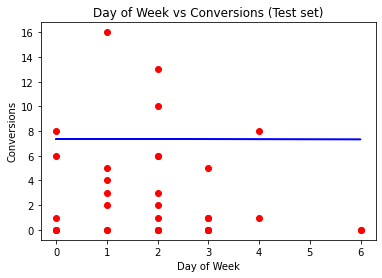

In [15]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor_linear_days.predict(X_train), color = 'blue')
plt.title('Day of Week vs Conversions (Test set)')
plt.xlabel('Day of Week')
plt.ylabel('Conversions')
plt.show()

In [16]:
df_all.describe()

,delivered,opens,uniqueOpens,clicks,uniqueClicks,conversions
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,1860.106509,1289.284024,651.733728,72.082840,49.372781,6.467456
std,2110.114054,1320.568232,697.140695,89.525031,68.315772,11.737727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,633.000000,563.000000,234.000000,15.000000,3.000000,0.000000
50%,1518.000000,1035.000000,523.000000,46.000000,30.000000,2.000000
75%,1617.000000,1355.000000,653.000000,93.000000,69.000000,8.000000
max,8309.000000,6719.000000,3880.000000,564.000000,475.000000,78.000000


In [17]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   subjectLine             169 non-null    object
 1   scheduledDateTimestamp  169 non-null    object
 2   delivered               169 non-null    int64 
 3   opens                   169 non-null    int64 
 4   uniqueOpens             169 non-null    int64 
 5   clicks                  169 non-null    int64 
 6   uniqueClicks            169 non-null    int64 
 7   conversions             169 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 11.9+ KB


In [18]:
df_all.corr()

,delivered,opens,uniqueOpens,clicks,uniqueClicks,conversions
delivered,1.000000,0.966294,0.977541,0.667642,0.565991,0.464578
opens,0.966294,1.000000,0.987052,0.708113,0.643016,0.479742
uniqueOpens,0.977541,0.987052,1.000000,0.653516,0.563692,0.429039
clicks,0.667642,0.708113,0.653516,1.000000,0.884419,0.476841
uniqueClicks,0.565991,0.643016,0.563692,0.884419,1.000000,0.432088
conversions,0.464578,0.479742,0.429039,0.476841,0.432088,1.000000


In [22]:
#LINEAR MODEL - BEST TIME OF DAY vs Conversions
new_x = time
new_y = df_all['conversions']
new_x = np.array(new_x)
updated_x = new_x.reshape(-1,1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(updated_x, new_y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#print(y_test)
y_pred = regressor.predict(X_test)
#print(y_pred)

##LINEAR MODEL - BEST TIME OF DAY vs Conversions
print("12 pm conversions expectation: ", regressor.predict([[12]]))
print("9 am conversions expectation: ", regressor.predict([[9]]))
print("5 pm conversions expectation: ", regressor.predict([[17]]))
print("3 pm conversions expectation: ", regressor.predict([[15]]))
print("8 am conversions expectation: ", regressor.predict([[8]]))
print("7 pm conversions expectation: ", regressor.predict([[19]]))
print("8 pm conversions expectation: ", regressor.predict([[20]]))
print("4 pm conversions expectation: ", regressor.predict([[16]]))

12 pm conversions expectation:  [6.79212762]
9 am conversions expectation:  [7.32623414]
5 pm conversions expectation:  [5.90195007]
3 pm conversions expectation:  [6.25802109]
8 am conversions expectation:  [7.50426965]
7 pm conversions expectation:  [5.54587905]
8 pm conversions expectation:  [5.36784354]
4 pm conversions expectation:  [6.07998558]


In [25]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

-1.2346615065316469


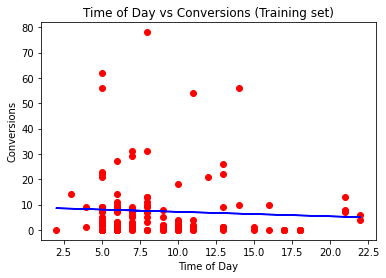

In [26]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Time of Day vs Conversions (Training set)')
plt.xlabel('Time of Day')
plt.ylabel('Conversions')
plt.show()

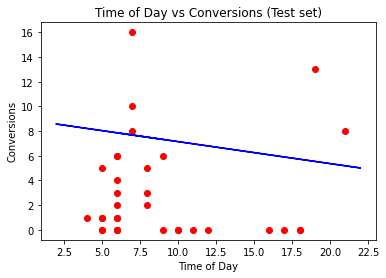

In [27]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Time of Day vs Conversions (Test set)')
plt.xlabel('Time of Day')
plt.ylabel('Conversions')
plt.show()

In [28]:
#RANDOM FOREST - BEST DAY OF WEEK FOR COVERSIONS
new_x = days
new_y = df_all['conversions']
new_x = np.array(new_x)
updated_x = new_x.reshape(-1,1)

In [29]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(updated_x, new_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [30]:
#RANDOM FOREST - BEST DAY OF WEEK FOR COVERSIONS
#Monday
print("Monday conversions expectation: ", regressor.predict([[0]]))
#Tuesday
print("Tuesday conversions expectation: ",regressor.predict([[1]]))
#Wednesday
print("Wednesday conversions expectation: ",regressor.predict([[2]]))
#Thursday
print("Thursday conversions expectation: ",regressor.predict([[3]]))
#Friday
print("Friday conversions expectation: ",regressor.predict([[4]]))
#Saturday
print("Saturday conversions expectation: ",regressor.predict([[5]]))
#Sunday
print("Sunday conversions expectation: ",regressor.predict([[6]]))

Monday conversions expectation:  [3.90719441]
Tuesday conversions expectation:  [7.14640084]
Wednesday conversions expectation:  [8.67559836]
Thursday conversions expectation:  [4.75820279]
Friday conversions expectation:  [3.83211377]
Saturday conversions expectation:  [1.1374359]
Sunday conversions expectation:  [9.1672583]


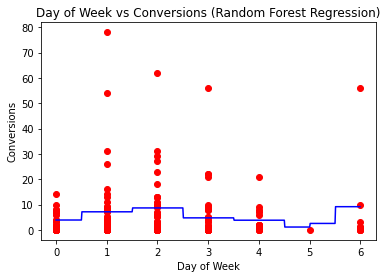

In [31]:
X_grid = np.arange(min(updated_x), max(updated_x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(updated_x, new_y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Day of Week vs Conversions (Random Forest Regression)')
plt.xlabel('Day of Week')
plt.ylabel('Conversions')
plt.show()

In [32]:
#RANDOM FOREST - BEST TIME OF DAY TO SEND EMAIL
new_x = time
new_y = df_all['conversions']
new_x = np.array(new_x)
updated_x = new_x.reshape(-1,1)

In [33]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(updated_x, new_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [34]:
#RANDOM FOREST - BEST TIME OF DAY TO SEND EMAIL FOR CONVERSIONS
print("12 pm conversions expectation: ", regressor.predict([[12]]))
print("9 am conversions expectation: ", regressor.predict([[9]]))
print("5 pm conversions expectation: ", regressor.predict([[17]]))
print("3 pm conversions expectation: ", regressor.predict([[15]]))
print("8 am conversions expectation: ", regressor.predict([[8]]))
print("7 pm conversions expectation: ", regressor.predict([[19]]))
print("8 pm conversions expectation: ", regressor.predict([[20]]))
print("4 pm conversions expectation: ", regressor.predict([[16]]))

12 pm conversions expectation:  [10.645]
9 am conversions expectation:  [2.34275891]
5 pm conversions expectation:  [0.]
3 pm conversions expectation:  [6.175]
8 am conversions expectation:  [9.08952519]
7 pm conversions expectation:  [7.8]
8 pm conversions expectation:  [11.43333333]
4 pm conversions expectation:  [3.43333333]


In [35]:
#POLYNOMIAL REGRESSION - BEST DAY OF WEEK TO SEND EMAIL
new_x = days
new_y = df_all['conversions']
new_x = np.array(new_x)
updated_x = new_x.reshape(-1,1)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(updated_x, new_y, test_size = 0.2, random_state = 0)

In [37]:
#ON WHOLE DATASET
from sklearn.linear_model import LinearRegression
#lin_reg = LinearRegression()
#lin_reg.fit(updated_x, new_y)

#SPLIT UP DATASET
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
#ON WHOLE DATASET
from sklearn.preprocessing import PolynomialFeatures
#poly_reg = PolynomialFeatures(degree = 4)
#X_poly = poly_reg.fit_transform(updated_x)
#lin_reg_2 = LinearRegression()
#lin_reg_2.fit(X_poly, new_y)

#SPLIT UP DATASET
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_pred = lin_reg_2.predict(poly_reg.transform(X_test))

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-1.439353022598997

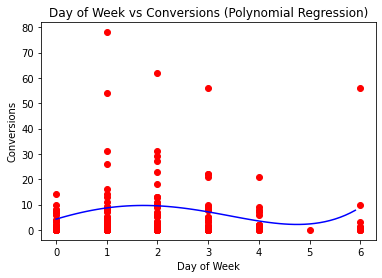

In [41]:
X_grid = np.arange(min(updated_x), max(updated_x), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(updated_x, new_y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Day of Week vs Conversions (Polynomial Regression)')
plt.xlabel('Day of Week')
plt.ylabel('Conversions')
plt.show()

In [43]:
#POLYNOMIAL MODEL PREDICTIONS FOR BEST DAYS OF WEEK TO SEND EMAIL AND GET MOST CONVERSIONS

#MONDAY
print("MONDAY conversions expectation: ", lin_reg_2.predict(poly_reg.fit_transform([[0]])))

#TUESDAY
print("TUESDAY conversions expectation: ", lin_reg_2.predict(poly_reg.fit_transform([[1]])))

#WEDNESDAY
print("WEDNESDAY conversions expectation: ", lin_reg_2.predict(poly_reg.fit_transform([[2]])))

#THURSDAY
print("THURSDAY conversions expectation: ", lin_reg_2.predict(poly_reg.fit_transform([[3]])))

#FRIDAY
print("FRIDAY conversions expectation: ", lin_reg_2.predict(poly_reg.fit_transform([[4]])))

#SATURDAY
print("SATURDAY conversions expectation: ", lin_reg_2.predict(poly_reg.fit_transform([[5]])))

#SUNDAY
print("SUNDAY conversions expectation: ", lin_reg_2.predict(poly_reg.fit_transform([[6]])))

MONDAY conversions expectation:  [4.24834879]
TUESDAY conversions expectation:  [8.68417819]
WEDNESDAY conversions expectation:  [9.511443]
THURSDAY conversions expectation:  [7.1147376]
FRIDAY conversions expectation:  [3.51299598]
SATURDAY conversions expectation:  [2.35949179]
SUNDAY conversions expectation:  [8.94183831]


In [44]:
#POLYNOMIAL REGRESSION - BEST TIME OF DAY TO SEND EMAIL
new_x = time
new_y = df_all['conversions']
print(sum(new_y))
new_x = np.array(new_x)
updated_x = new_x.reshape(-1,1)

1093


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(updated_x, new_y, test_size = 0.2, random_state = 0)

In [46]:
#ON WHOLE DATASET
from sklearn.linear_model import LinearRegression
#lin_reg = LinearRegression()
#lin_reg.fit(updated_x, new_y)

#SPLIT UP DATASET
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#ON WHOLE DATASET
from sklearn.preprocessing import PolynomialFeatures
#poly_reg = PolynomialFeatures(degree = 4)
#X_poly = poly_reg.fit_transform(updated_x)
#lin_reg_2 = LinearRegression()
#lin_reg_2.fit(X_poly, new_y)

#SPLIT UP DATASET
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_pred = lin_reg_2.predict(poly_reg.transform(X_test))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-1.211224312460243

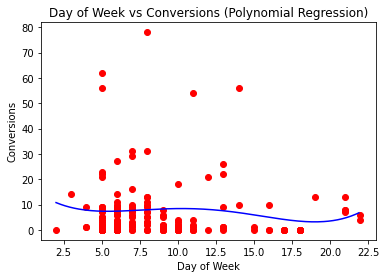

In [49]:
X_grid = np.arange(min(updated_x), max(updated_x), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(updated_x, new_y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Day of Week vs Conversions (Polynomial Regression)')
plt.xlabel('Day of Week')
plt.ylabel('Conversions')
plt.show()

In [50]:

#POLYNOMIAL MODEL - BEST TIME OF DAY TO SEND EMAIL FOR HIGHER CONVERSIONS
print("12 pm conversions expectation: ", lin_reg_2.predict(poly_reg.fit_transform([[12]])))
print("9 am conversions expectation: ", lin_reg_2.predict(poly_reg.fit_transform([[9]])))
print("5 pm conversions expectation: ", lin_reg_2.predict(poly_reg.fit_transform([[17]])))
print("3 pm conversions expectation: ", lin_reg_2.predict(poly_reg.fit_transform([[15]])))
print("8 am conversions expectation: ", lin_reg_2.predict(poly_reg.fit_transform([[8]])))
print("7 pm conversions expectation: ", lin_reg_2.predict(poly_reg.fit_transform([[19]])))
print("8 pm conversions expectation: ", lin_reg_2.predict(poly_reg.fit_transform([[20]])))
print("4 pm conversions expectation: ", lin_reg_2.predict(poly_reg.fit_transform([[16]])))

12 pm conversions expectation:  [8.08037636]
9 am conversions expectation:  [8.27070994]
5 pm conversions expectation:  [4.11489253]
3 pm conversions expectation:  [5.9375586]
8 am conversions expectation:  [7.98192793]
7 pm conversions expectation:  [3.17893618]
8 pm conversions expectation:  [3.51942409]
4 pm conversions expectation:  [4.99517845]
